## Introduction

This is my Deep Learning with pytorch notebook, as well as my IT 100 course project. In this notebook, I would be using the **MNIST** dataset from the Kaggle competition [Kaggle-Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer/overview "Kaggle-Digit Recognizer") to train deep learning models to recognize digit in images, and the result would be evaluated by the accuracy of the model. 

I applied the artificial neural networks (ANNs), convolutional neural networks (CNNs), and recurrent neural networks (RNNs). In conclusion, the CNNs have the best accuracy rate and works the best. The accuracy of the ANNs and RNNs both above 90%. The accuracy of RNNs appeared to be very unstable because of overfitting. 

### What is MNIST and Why

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As my first learning deep learning practice, I expect to have high-quality and clearly labeled datasets. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike. 

### About the Data

https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


### Learning resource

There are three parts of this project that I need to learn: deep learning, pytorch and the coding practice. 

- The main source of pytorch learning is [PYTORCH TUTORIALS](http://pytorch.org/tutorials/ "PYTORCH TUTORIALS"), which contains everything you need to know about the pytorch library. 

- I used the [Deep Learning for Coders with fastai and PyTorch by Jeremy Howard, Sylvain Gugger](https://www.oreilly.com/library/view/deep-learning-for/9781492045519/ "Deep Learning for Coders with fastai and PyTorch by Jeremy Howard, Sylvain Gugger") as my textbook but I manily focused on the algorithms part since I already studied a bit intro-level deep learning before. 

- I referred to many great codes from kaggle: 
 - [Pytorch Tutorial for Deep Learning Lovers](https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers "Pytorch Tutorial for Deep Learning Lovers")
 - [MNIST: Simple CNN , KNN (Accuracy: 100%)](https://www.kaggle.com/code/ahmed121ashraf131/mnist-simple-cnn-knn-accuracy-100-top-1 "MNIST: Simple CNN , KNN (Accuracy: 100%)")
 - [Recurrent Neural Network with Pytorch](https://www.kaggle.com/code/kanncaa1/recurrent-neural-network-with-pytorch "Recurrent Neural Network with Pytorch")
 - [PyTorch RNNs and LSTMs Explained ](https://www.kaggle.com/code/andradaolteanu/pytorch-rnns-and-lstms-explained-acc-0-99 "PyTorch RNNs and LSTMs Explained ")

## Methods

### Deep Learning

**Definition** : Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. [Deep Learning, Yann LeCun, Yoshua Bengio & Geoffrey Hinton ][521, pages 436–444 (2015)]
#### Neural Networks
The conept and application of Neural Networks in deep learning were inspired by the biological neural networks. Computer scientists use neural networks to teach machine to learn and predict like human (still in a way more simple way than human). 
#### ANNs
#### CNNs
#### RNNs

### Data Processing

In [41]:
# import the basic python processing library
import numpy as np # for math
import pandas as pd # for read files 
import matplotlib.pyplot as plt # for plotting and visualize
import seaborn as sns

import os 
print(os.listdir("/Users/xieh/Desktop/CC/IT100/data"))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


In [27]:
# import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split

In [39]:
# load the data
train = pd.read_csv("/Users/xieh/Desktop/CC/IT100/data/train.csv",dtype = np.float32)

# quick check
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    4684
7.0    4401
3.0    4351
9.0    4188
2.0    4177
6.0    4137
0.0    4132
4.0    4072
8.0    4063
5.0    3795
Name: label, dtype: int64

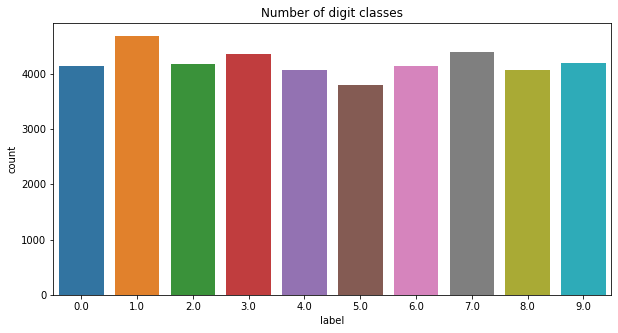

In [43]:
train_label = train["label"]
plt.figure(figsize=(10,5))
g = sns.countplot(train_label)
plt.title("Number of digit classes")
train_label.value_counts()

We can see that the numbers are pretty even, so we have enough data for each number for training to ensure a fair model.

### Prepare the data

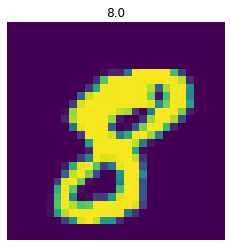

In [5]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# we need to make feature and targets tensor because we need variable to accumulate the gradients
# train set
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) 

# test set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# train and test sets for pytorch
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

### ANN

In [20]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# Optimize the model
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7958003282546997  Accuracy: 77.27381134033203 %
Iteration: 1000  Loss: 0.49348846077919006  Accuracy: 87.29762268066406 %
Iteration: 1500  Loss: 0.23776870965957642  Accuracy: 89.44047546386719 %
Iteration: 2000  Loss: 0.3035808503627777  Accuracy: 90.32142639160156 %
Iteration: 2500  Loss: 0.3345557749271393  Accuracy: 91.64286041259766 %
Iteration: 3000  Loss: 0.12811076641082764  Accuracy: 92.6547622680664 %
Iteration: 3500  Loss: 0.25519779324531555  Accuracy: 93.4047622680664 %
Iteration: 4000  Loss: 0.06071951240301132  Accuracy: 93.92857360839844 %
Iteration: 4500  Loss: 0.3101288974285126  Accuracy: 94.29762268066406 %
Iteration: 5000  Loss: 0.10979079455137253  Accuracy: 94.41666412353516 %
Iteration: 5500  Loss: 0.18102960288524628  Accuracy: 94.6547622680664 %
Iteration: 6000  Loss: 0.21061591804027557  Accuracy: 94.95237731933594 %
Iteration: 6500  Loss: 0.10402809083461761  Accuracy: 95.20237731933594 %
Iteration: 7000  Loss: 0.12335926294326782  Ac

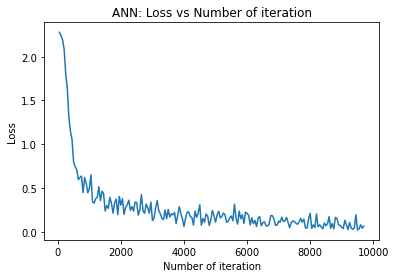

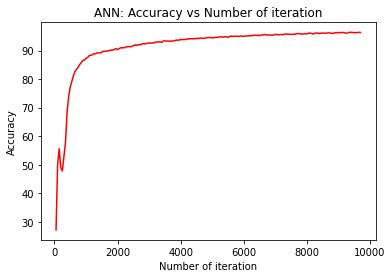

In [22]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

### CNN

In [23]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# Optimize the model
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.09827576577663422  Accuracy: 96.61904907226562 %
Iteration: 1000  Loss: 0.04587576538324356  Accuracy: 97.60713958740234 %
Iteration: 1500  Loss: 0.037159014493227005  Accuracy: 97.69047546386719 %
Iteration: 2000  Loss: 0.02659369260072708  Accuracy: 98.23809814453125 %


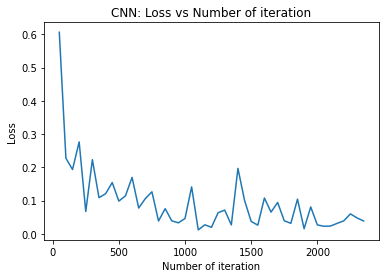

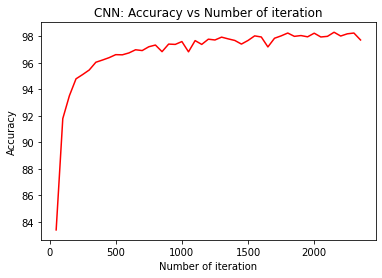

In [25]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### RNN

In [35]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 8000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# Optimize the model
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [36]:
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
            
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data.item(), accuracy))

Iteration: 500  Loss: 1.5172816514968872  Accuracy: 47.10714340209961 %
Iteration: 1000  Loss: 0.6231970191001892  Accuracy: 63.67856979370117 %
Iteration: 1500  Loss: 0.6226745843887329  Accuracy: 85.58333587646484 %
Iteration: 2000  Loss: 1.0142627954483032  Accuracy: 62.595237731933594 %
Iteration: 2500  Loss: 0.26161980628967285  Accuracy: 89.69047546386719 %
Iteration: 3000  Loss: 0.2305048108100891  Accuracy: 91.96428680419922 %
Iteration: 3500  Loss: 0.28038251399993896  Accuracy: 91.71428680419922 %
Iteration: 4000  Loss: 0.27468547224998474  Accuracy: 90.76190185546875 %
Iteration: 4500  Loss: 0.29120463132858276  Accuracy: 94.48809814453125 %
Iteration: 5000  Loss: 0.14339648187160492  Accuracy: 94.9047622680664 %
Iteration: 5500  Loss: 0.279252290725708  Accuracy: 93.02381134033203 %
Iteration: 6000  Loss: 0.2151205688714981  Accuracy: 94.98809814453125 %
Iteration: 6500  Loss: 0.2789528965950012  Accuracy: 88.28571319580078 %
Iteration: 7000  Loss: 0.26801005005836487  Accu

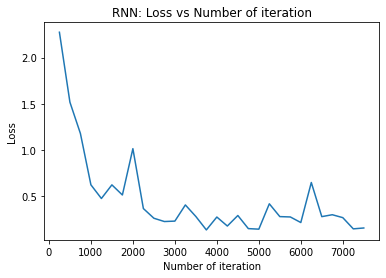

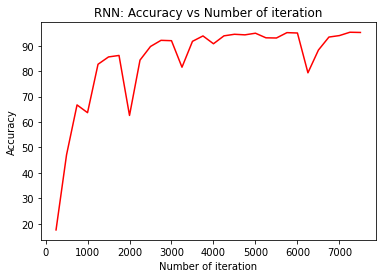

In [37]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()

## Conclusion
